# Import Libraries

In [5]:
import numpy as np
from scipy.signal import cont2discrete
from tabulate import tabulate
import math
from lcapy import Circuit

# Models

## Example Circuit

In [6]:

example = Circuit("""
V 1 0 {v(t)}; down
R1 1 2; right
L 2 3; right=1.5, i={i_L}
R2 3 0_3; down=1.5, i={i_{R2}}, v={v_{R2}}
W 0 0_3; right
W 3 3_a; right
C 3_a 0_4; down, i={i_C}, v={v_C}
W 0_3 0_4; right""")


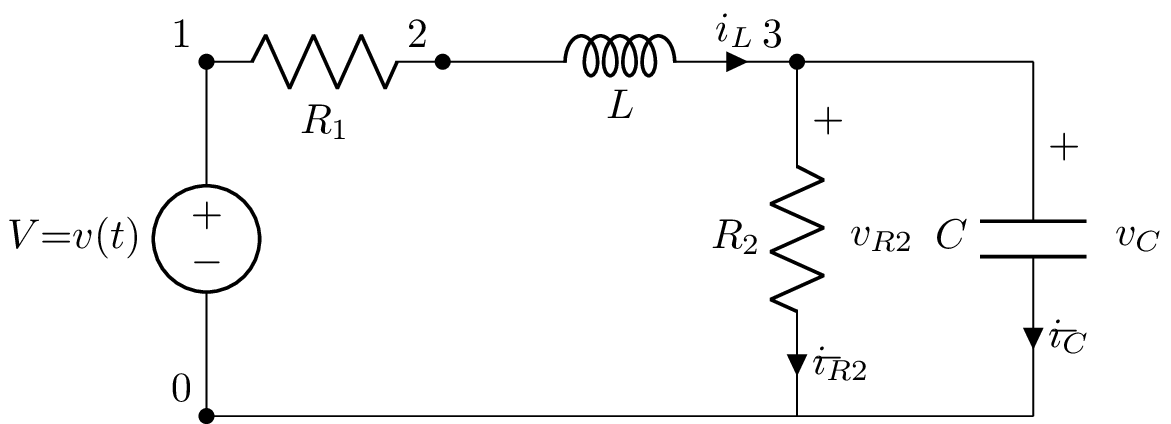

In [7]:
example.draw()

In [8]:
ss = example.ss

In [9]:
ss.state_equations()

⎡d         ⎤   ⎡-R₁   -1  ⎤                      
⎢──(i_L(t))⎥   ⎢────  ─── ⎥            ⎡1⎤       
⎢dt        ⎥   ⎢ L     L  ⎥ ⎡i_L(t)⎤   ⎢─⎥       
⎢          ⎥ = ⎢          ⎥⋅⎢      ⎥ + ⎢L⎥⋅[v(t)]
⎢d         ⎥   ⎢ 1    -1  ⎥ ⎣v_C(t)⎦   ⎢ ⎥       
⎢──(v_C(t))⎥   ⎢ ─    ────⎥            ⎣0⎦       
⎣dt        ⎦   ⎣ C    C⋅R₂⎦                      

In [10]:
ss.output_equations()

            ⎡ 0    0 ⎤                      
            ⎢        ⎥                      
⎡ v₁(t) ⎤   ⎢-R₁   0 ⎥            ⎡1⎤       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢ v₂(t) ⎥   ⎢ 0    1 ⎥            ⎢1⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢ v₃(t) ⎥   ⎢-1    0 ⎥            ⎢0⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢i_V(t) ⎥   ⎢ 1    0 ⎥ ⎡i_L(t)⎤   ⎢0⎥       
⎢       ⎥ = ⎢        ⎥⋅⎢      ⎥ + ⎢ ⎥⋅[v(t)]
⎢i_R1(t)⎥   ⎢ 1    0 ⎥ ⎣v_C(t)⎦   ⎢0⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎢i_L(t) ⎥   ⎢     1  ⎥            ⎢0⎥       
⎢       ⎥   ⎢ 0   ── ⎥            ⎢ ⎥       
⎢i_R2(t)⎥   ⎢     R₂ ⎥            ⎢0⎥       
⎢       ⎥   ⎢        ⎥            ⎢ ⎥       
⎣i_C(t) ⎦   ⎢     -1 ⎥            ⎣0⎦       
            ⎢ 1   ───⎥                      
            ⎣      R₂⎦                      

## LCL Circuit

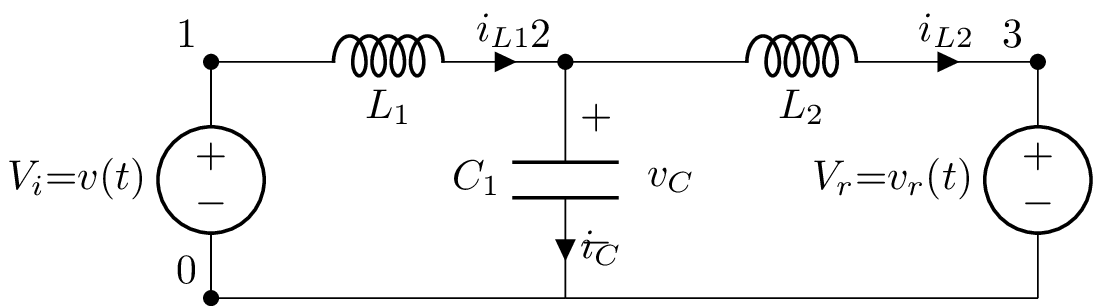

In [11]:
# Definindo o circuito LCL corrigido
lcl = Circuit("""
Vi 1 0 {v(t)}; down
L1 1 2 ; right=1.5, i={i_{L1}}
C1 2 0_2 ; down, i={i_C}, v={v_C}
L2 2 3 ; right=2, i={i_{L2}}
Vr 3 0_3 {vr(t)}; down
W 0 0_2; right
W 0_2 0_3; right

""")

lcl.draw()

In [12]:
lcl_ss = lcl.ss

In [13]:
lcl_ss.state_equations()

⎡d          ⎤   ⎡         -1 ⎤                              
⎢──(i_L1(t))⎥   ⎢0    0   ───⎥             ⎡1      ⎤        
⎢dt         ⎥   ⎢          L₁⎥             ⎢──   0 ⎥        
⎢           ⎥   ⎢            ⎥ ⎡i_L1(t)⎤   ⎢L₁     ⎥        
⎢d          ⎥   ⎢         1  ⎥ ⎢       ⎥   ⎢       ⎥ ⎡v(t) ⎤
⎢──(i_L2(t))⎥ = ⎢0    0   ── ⎥⋅⎢i_L2(t)⎥ + ⎢    -1 ⎥⋅⎢     ⎥
⎢dt         ⎥   ⎢         L₂ ⎥ ⎢       ⎥   ⎢0   ───⎥ ⎣vᵣ(t)⎦
⎢           ⎥   ⎢            ⎥ ⎣v_C1(t)⎦   ⎢     L₂⎥        
⎢d          ⎥   ⎢1   -1      ⎥             ⎢       ⎥        
⎢──(v_C1(t))⎥   ⎢──  ───   0 ⎥             ⎣0    0 ⎦        
⎣dt         ⎦   ⎣C₁   C₁     ⎦                              

In [14]:
lcl_ss.output_equations()

⎡ v₁(t) ⎤   ⎡0   0   0⎤             ⎡1  0⎤        
⎢       ⎥   ⎢         ⎥             ⎢    ⎥        
⎢ v₂(t) ⎥   ⎢0   0   1⎥             ⎢0  0⎥        
⎢       ⎥   ⎢         ⎥             ⎢    ⎥        
⎢ v₃(t) ⎥   ⎢0   0   0⎥             ⎢0  1⎥        
⎢       ⎥   ⎢         ⎥ ⎡i_L1(t)⎤   ⎢    ⎥        
⎢i_Vi(t)⎥   ⎢-1  0   0⎥ ⎢       ⎥   ⎢0  0⎥ ⎡v(t) ⎤
⎢       ⎥ = ⎢         ⎥⋅⎢i_L2(t)⎥ + ⎢    ⎥⋅⎢     ⎥
⎢i_L1(t)⎥   ⎢1   0   0⎥ ⎢       ⎥   ⎢0  0⎥ ⎣vᵣ(t)⎦
⎢       ⎥   ⎢         ⎥ ⎣v_C1(t)⎦   ⎢    ⎥        
⎢i_C1(t)⎥   ⎢1   -1  0⎥             ⎢0  0⎥        
⎢       ⎥   ⎢         ⎥             ⎢    ⎥        
⎢i_L2(t)⎥   ⎢0   1   0⎥             ⎢0  0⎥        
⎢       ⎥   ⎢         ⎥             ⎢    ⎥        
⎣i_Vr(t)⎦   ⎣0   1   0⎦             ⎣0  0⎦        

## LCL Circuit (w/ damp)

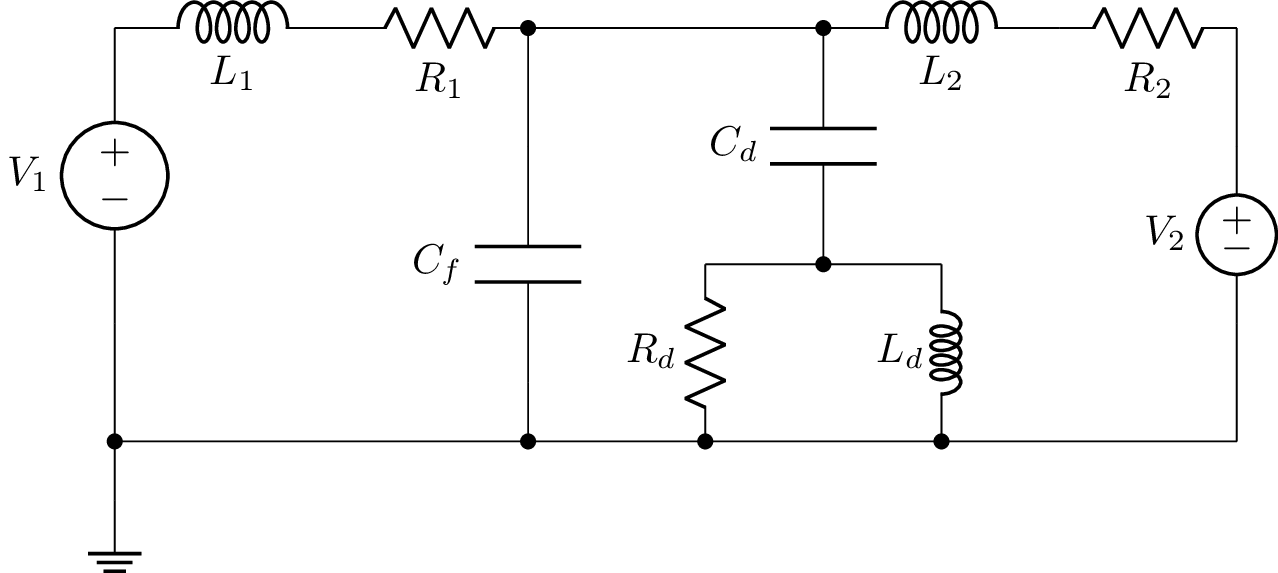

In [15]:

lcl_damp = Circuit("""
# Created by lcapy-tk V0.94
; nodes={1@(2.5, 7.5), 2@(2.5, 5), 3@(4.5, 7.5), 4@(6, 7.5), 5@(6, 6.5), 6@(6, 4.5), 7@(8.5, 7.5), 8@(8.5, 5.5), 9@(7.5, 5.5), 10@(7.5, 4), 11@(9.5, 5.5), 12@(9.5, 4), 13@(2.5, 4), 14@(6, 4), 15@(10.5, 7.5), 16@(12, 7.5), 17@(12, 6.5), 18@(12, 5), 19@(12, 4), 0@(2.5, 3.5)}
V1 1 2; down=1.25
L1 1 3; right
R1 3 4; right=0.75, scale=0.75
Cf 5 6; down
W1 4 5; down=0.5, scale=0.5
Rd 9 10; down=0.75, scale=0.75
Cd 7 8; down
Ld 11 12; down=0.75, scale=0.75
W2 4 7; right=1.25
W3 9 8; right=0.5, scale=0.5
W4 8 11; right=0.5, scale=0.5
W5 10 12; right
W6 2 13; down=0.5, scale=0.5
W7 6 14; down=0.25, scale=0.25
W8 13 14; right=1.75
W9 14 10; right=0.75, scale=0.75
L2 7 15; right
R2 15 16; right=0.75, scale=0.75
V2 17 18; down=0.75, scale=0.75
W10 12 19; right=1.25
W11 18 19; down=0.5, scale=0.5
W12 16 17; down=0.5, scale=0.5
W13 13 0; down=0.25, scale=0.25, ground
; draw_nodes=connections, label_nodes=none, style=american, voltage_dir=RP, label_style=name

""")

lcl_damp.draw()

In [16]:
lcl_damp_ss = lcl_damp.ss

c:\Users\uriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\lcapy\matrix.py:297: UserWarning: 
This may take a while...  A symbolic matrix inversion is O(10^3) for a matrix
of size 10x10
  warn("""


In [17]:
lcl_damp_ss.state_equations()

⎡d          ⎤   ⎡-R₁                -1            ⎤                           
⎢──(i_L1(t))⎥   ⎢────   0    0      ───       0   ⎥                           
⎢dt         ⎥   ⎢ L₁                 L₁           ⎥                           
⎢           ⎥   ⎢                                 ⎥             ⎡1      ⎤     
⎢d          ⎥   ⎢                    1       -1   ⎥             ⎢──   0 ⎥     
⎢──(i_Ld(t))⎥   ⎢ 0     0    0      ───      ───  ⎥ ⎡i_L1(t)⎤   ⎢L₁     ⎥     
⎢dt         ⎥   ⎢                   L_d      L_d  ⎥ ⎢       ⎥   ⎢       ⎥     
⎢           ⎥   ⎢                                 ⎥ ⎢i_Ld(t)⎥   ⎢0    0 ⎥     
⎢d          ⎥   ⎢           -R₂     1             ⎥ ⎢       ⎥   ⎢       ⎥ ⎡V₁⎤
⎢──(i_L2(t))⎥ = ⎢ 0     0   ────    ──        0   ⎥⋅⎢i_L2(t)⎥ + ⎢    -1 ⎥⋅⎢  ⎥
⎢dt         ⎥   ⎢            L₂     L₂            ⎥ ⎢       ⎥   ⎢0   ───⎥ ⎣V₂⎦
⎢           ⎥   ⎢                                 ⎥ ⎢v_Cf(t)⎥   ⎢     L₂⎥     
⎢d          ⎥   ⎢ 1    -1   -1      -1        1   ⎥ 

$$
\frac{di_{L_1}(t)}{dt} = \frac{1}{L_1}V_1 - \frac{R_1}{L_1}i_{L_1}(t) - \frac{1}{L_1}v_{C_f}(t)
$$

$$
\frac{di_{L_d}(t)}{dt} = \frac{1}{L_d}v_{C_f}(t) - \frac{1}{L_d}v_{C_d}(t)
$$

$$
\frac{di_{L_2}(t)}{dt} = -\frac{1}{L_2}V_2 - \frac{R_2}{L_2}i_{L_2}(t) + \frac{1}{L_2}v_{C_f}(t)
$$

$$
\frac{dv_{C_f}(t)}{dt} = \frac{1}{C_f} i_{L_1}(t) - \frac{1}{C_f} i_{L_d}(t) - \frac{1}{C_f} i_{L_2}(t) - \frac{1}{C_f R_d} v_{C_f}(t) + \frac{1}{C_f R_d} v_{C_d}(t)
$$

$$
\frac{dv_{C_d}(t)}{dt} = \frac{1}{C_d} i_{L_d}(t) - \frac{1}{C_d R_d} v_{C_d}(t) + \frac{1}{C_d R_d} v_{C_f}(t)
$$

In [18]:
lcl_damp_ss.output_equations()

            ⎡0   0   0    0    0 ⎤                        
            ⎢                    ⎥                        
            ⎢0   0   0    1   -1 ⎥                        
⎡ v₁(t) ⎤   ⎢                    ⎥             ⎡1  0⎤     
⎢       ⎥   ⎢0   0   R₂   0    0 ⎥             ⎢    ⎥     
⎢v₁₁(t) ⎥   ⎢                    ⎥             ⎢0  0⎥     
⎢       ⎥   ⎢0   0   0    0    0 ⎥             ⎢    ⎥     
⎢v₁₅(t) ⎥   ⎢                    ⎥             ⎢0  1⎥     
⎢       ⎥   ⎢R₁  0   0    1    0 ⎥             ⎢    ⎥     
⎢v₁₆(t) ⎥   ⎢                    ⎥             ⎢0  1⎥     
⎢       ⎥   ⎢0   0   0    1    0 ⎥             ⎢    ⎥     
⎢ v₃(t) ⎥   ⎢                    ⎥             ⎢0  0⎥     
⎢       ⎥   ⎢-1  0   0    0    0 ⎥             ⎢    ⎥     
⎢ v₄(t) ⎥   ⎢                    ⎥             ⎢0  0⎥     
⎢       ⎥   ⎢1   0   0    0    0 ⎥ ⎡i_L1(t)⎤   ⎢    ⎥     
⎢i_V1(t)⎥   ⎢                    ⎥ ⎢       ⎥   ⎢0  0⎥     
⎢       ⎥   ⎢1   0   0    0    0 ⎥ ⎢i_Ld(t)⎥   ⎢    ⎥   

## LCL Circuit (w/ damp) [Discrete]

In [19]:
lcl_damp_ss_disc = lcl_damp_ss.discretize()

In [20]:
lcl_damp_ss_disc.state_equations()

                ⎡                                                             
                ⎢                                                             
                ⎢                                                             
                ⎢─────────────────────────────────────────────────────────────
                ⎢                  2                                          
                ⎢0.03125⋅C_d⋅C_f⋅Δₜ ⋅L_d⋅R₁⋅R₂⋅R_d + 0.0625⋅C_d⋅C_f⋅Δₜ⋅L₁⋅L_d⋅
                ⎢                                                             
                ⎢                                                             
                ⎢                                                             
                ⎢                                                             
                ⎢                                ─────────────────────────────
                ⎢                                                 2           
                ⎢                                0.0

# Project 1

![](img/InverterOut1.png)
![](img/InverterOut2.png)

The state-space model of the LCL filter for this project was modeled in LCL_Model.ipynb. In this project, we will obtain the A and B matrices based on the design parameters already determined.

$$
\dot{x} = Ax + Bu
$$

$$
y = Cx + Du
$$

$$\frac{d}{dt} \begin{bmatrix} i_{L_{1}}(t) \\ i_{L_{d}}(t) \\ i_{L_{2}}(t) \\ v_{C_{f}}(t) \\ v_{C_{d}}(t) \end{bmatrix} = 

\begin{bmatrix} -\frac{R_{1}}{L_{1}} & 0 & 0 & -\frac{1}{L_{1}} & 0 \\ 0 & 0 & 0 & \frac{1}{L_{d}} & -\frac{1}{L_{d}} \\ 0 & 0 & -\frac{R_{2}}{L_{2}} & \frac{1}{L_{2}} & 0 \\ \frac{1}{C_{f}} & -\frac{1}{C_{f}} & -\frac{1}{C_{f}} & -\frac{1}{C_{f} R_{d}} & \frac{1}{C_{f} R_{d}} \\ 0 & \frac{1}{C_{d}} & 0 & \frac{1}{C_{d} R_{d}} & -\frac{1}{C_{d} R_{d}} \end{bmatrix} \begin{bmatrix} i_{L_{1}}(t) \\ i_{L_{d}}(t) \\ i_{L_{2}}(t) \\ v_{C_{f}}(t) \\ v_{C_{d}}(t) \end{bmatrix}

+ \begin{bmatrix} \frac{1}{L_{1}} & 0 \\ 0 & 0 \\ 0 & -\frac{1}{L_{2}} \\ 0 & 0 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} V_{1} \\ V_{2} \end{bmatrix} $$

## Parameters

In [28]:
######################## Inverter #########################
n_books     =   1;                   # number of books in parallell
Vdc         =   1500;                # DC Link voltage

L1_book	    =	110e-6;              # filter inductance
R1_book	    =   1.0e-6;              # filter losses
Cf_boook	=	50e-6*3;             # capacitor filter multiplied by 3 due to Delta connection
Cd_book     =   25e-6*3;             # damping capacitor multiplied by 3 due to Delta connection
Ld_book     =   850e-6/3;            # damping inductor divided by 3 due to Delta connection
Rd_book     =   2.5/3;               # damping resistor divided by 3 due to Delta connection

L1	        =	L1_book/n_books;     # filter inductance
R1	        =   R1_book/n_books;     # filter losses
Cf	        =	Cf_boook*n_books;    # capacitor 
Cd          =   Cd_book*n_books;     # damping capacitor 
Ld          =   Ld_book/n_books;     # damping inductor 
Rd          =   Rd_book/n_books;     # damping resistor 

######################## Grid #########################
f_grid      = 60;                    # 60Hz 
Vgprim_ll   = 34.5e3;                # 34500 Vrms line to line primary
Vgsec_ll    = 925;                   # 925 Vrms line to line secondary
Vpgsec_ln   = 925/np.sqrt(3)*np.sqrt(2);   # 756 Vpk line secondary
S_trafo     = 4.42e6;                # Power 4.42MVA
P_loss      = 50400;                 # Power loss from datasheet
Z_trafo     = 7.3/100;               # 7.3% impedance from datasheet 

# Trafo
Igrid_nom = S_trafo/np.sqrt(3)/Vgsec_ll
Zbase = (Vgsec_ll**2)/S_trafo
N_trafo = Vgprim_ll/Vgsec_ll

Zeq = Z_trafo*Zbase 
Req = P_loss/(Igrid_nom**2)
Xeq = np.sqrt((Zeq**2)-(Req**2))

L_trafo	 =	Xeq/(2*np.pi*f_grid)      # transformer equivalent inductance
R_trafo  =	Req                       # transformer losses

# Grid Parameters
SCR = 10
Ssc = SCR*S_trafo
L_grid = Vgsec_ll**2/(Ssc*2*np.pi*f_grid)

# L2, R2 
L2 = L_grid + L_trafo
R2 = R_trafo


In [22]:
print("\n L2 = ",L2)
print("\n R2 = ",R2)


 L2 =  8.446297194237933e-05

 R2 =  0.006622023504842241


In [23]:
A = np.array([
    [-R1/L1, 0, 0, -1/L1, 0],
    [0, 0, 0, 1/Ld, -1/Ld],
    [0, 0, -R2/L2, 1/L2, 0],
    [1/Cf, -1/Cf, -1/Cf, -1/(Cf*Rd), 1/(Cf*Rd)],
    [0, 1/Cd, 0, 1/(Cd*Rd), -1/(Cd*Rd)],
])

B = np.array([
    [1/L1, 0],
    [0, 0],
    [0, -1/L2],
    [0, 0],
    [0, 0]
])

C = np.eye(5)
D = np.zeros((5, 2))

In [24]:
print("\n Matrix A =")
print(tabulate([[f"{num:.5e}" for num in linha] for linha in A], tablefmt="fancy_grid"))

print("\n Matrix B =")
print(tabulate([[f"{num:.5e}" for num in linha] for linha in B], tablefmt="fancy_grid"))


 Matrix A =
╒═══════════════╤══════════╤════════════╤══════════╤═══════════╕
│   -0.00909091 │     0    │     0      │ -9090.91 │      0    │
├───────────────┼──────────┼────────────┼──────────┼───────────┤
│    0          │     0    │     0      │  3529.41 │  -3529.41 │
├───────────────┼──────────┼────────────┼──────────┼───────────┤
│    0          │     0    │   -78.4015 │ 11839.5  │      0    │
├───────────────┼──────────┼────────────┼──────────┼───────────┤
│ 6666.67       │ -6666.67 │ -6666.67   │ -8000    │   8000    │
├───────────────┼──────────┼────────────┼──────────┼───────────┤
│    0          │ 13333.3  │     0      │ 16000    │ -16000    │
╘═══════════════╧══════════╧════════════╧══════════╧═══════════╛

 Matrix B =
╒═════════╤══════════╕
│ 9090.91 │      0   │
├─────────┼──────────┤
│    0    │      0   │
├─────────┼──────────┤
│    0    │ -11839.5 │
├─────────┼──────────┤
│    0    │      0   │
├─────────┼──────────┤
│    0    │      0   │
╘═════════╧══════════╛


## State Space Discretization

$$
\dot{x} = Ax + Bu
$$

$$
x_{k+1} = A_dx_k + B_du_k
$$

$$
y_k = C_d x_k + D_du_k
$$

In [32]:
# Calc Step
Ts = 500e-9
Ad, Bd, _, _, _ = cont2discrete((A, B, C, D), Ts, method='bilinear')

In [33]:
print("\n Matrix Ad =")
print(tabulate([[f"{num:.5e}" for num in linha] for linha in Ad], tablefmt="fancy_grid"))

print("\n Matrix Bd =")
print(tabulate([[f"{num:.5e}" for num in linha] for linha in Bd], tablefmt="fancy_grid"))


 Matrix Ad =
╒═════════════╤══════════════╤══════════════╤═════════════╤══════════════╕
│ 0.999992    │  7.53048e-06 │  7.56047e-06 │ -0.00453637 │ -9.04322e-06 │
├─────────────┼──────────────┼──────────────┼─────────────┼──────────────┤
│ 2.9236e-06  │  0.999991    │ -2.92354e-06 │  0.00175416 │ -0.00175417  │
├─────────────┼──────────────┼──────────────┼─────────────┼──────────────┤
│ 9.84635e-06 │ -9.80709e-06 │  0.999951    │  0.00590781 │  1.17772e-05 │
├─────────────┼──────────────┼──────────────┼─────────────┼──────────────┤
│ 0.00332667  │ -0.00331341  │ -0.00332661  │  0.996004   │  0.00397901  │
├─────────────┼──────────────┼──────────────┼─────────────┼──────────────┤
│ 1.32634e-05 │  0.00662688  │ -1.32631e-05 │  0.00795803 │  0.992042    │
╘═════════════╧══════════════╧══════════════╧═════════════╧══════════════╛

 Matrix Bd =
╒═════════════╤══════════════╕
│ 0.00454544  │ -2.23781e-08 │
├─────────────┼──────────────┤
│ 6.64454e-09 │  8.65332e-09 │
├─────────────┼────────

## Fixed Point Representation

In [34]:
# Definir o fator de escala para Q22
scale_factor = 2**22

# Converter a matriz para ponto fixo
Ad_fp = np.round(Ad * scale_factor).astype(int)
Bd_fp = np.round(Bd * scale_factor).astype(int)

print("\n Matrix Ad_FxedPoint =")
print(tabulate([[f"{num:.5e}" for num in linha] for linha in Ad_fp], tablefmt="fancy_grid"))

print("\n Matrix Bd_FxedPoint =")
print(tabulate([[f"{num:.5e}" for num in linha] for linha in Bd_fp], tablefmt="fancy_grid"))


 Matrix Ad_FxedPoint =
╒═════════════════╤══════════════════╤═════════════════╤══════════════════╤═════════════════╕
│     4.19427e+06 │     32           │     32          │ -19027           │   -38           │
├─────────────────┼──────────────────┼─────────────────┼──────────────────┼─────────────────┤
│    12           │      4.19427e+06 │    -12          │   7357           │ -7358           │
├─────────────────┼──────────────────┼─────────────────┼──────────────────┼─────────────────┤
│    41           │    -41           │      4.1941e+06 │  24779           │    49           │
├─────────────────┼──────────────────┼─────────────────┼──────────────────┼─────────────────┤
│ 13953           │ -13897           │ -13953          │      4.17754e+06 │ 16689           │
├─────────────────┼──────────────────┼─────────────────┼──────────────────┼─────────────────┤
│    56           │  27795           │    -56          │  33378           │     4.16092e+06 │
╘═════════════════╧═════════════════